<a href="https://colab.research.google.com/github/jx-dohwan/Deep_Learning_from_Scratch_2_study/blob/main/CH5_%EC%88%9C%ED%99%98%EC%8B%A0%EA%B2%BD%EB%A7%9D(RNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CH5_순환신경망(RNN)
> 지금까지 상펴본 신경망은 피드포워드(feed forward)라는 유형의 신경망이다. 쉽게 말하면 단방향인 신경망을 말한다. 피드포워드 신경망에서는 시계열 데이터의 성질(패턴)을 충분히 학습할 수 없다. 그래서 순환 신경망(RNN)이 등장하게 된다. 

## 1. 확률과 언어 모델
> wrod2vec를 복습하고 자연어에 관한 현상을 '확률'을 사용해서 기술하고, 마지막에는 언어를 확률로 다루는 '언어 모델'에 대해 설명한다.

### 1) word2vec을 확률 관점에서 바라보다
> CBOW 모델을 학습시키는 본래 목적은 맥락으로부터 타깃을 정확하게 추측하는 것이다. 이 목적을 위해 학습을 진행하면, 단어의 의미가 인코딩된 단어의분산표현을 얻을 수 있다.<br><br> 그러면 CVOW 모델의 본래 목적인 맥락으로부터 타깃을 추측하는 것은 어디에 이용될 수 있을까? 여기에서 언어 모델이 등장한다.



### 2) 언어 모델
> 언어 모델은 단어 나열에 확률을 부여한다. 특정한 단어의 시퀀스에 대해서, 그 시퀀스가 일어날 가능성이 어느 저옫인지를 확률로 평가하는 것이다. 이 언어 모델은 다양하게 응용될 수 있다. 기계번역과 음성인식이 대표적인 예이다. <br><br> 이 언어 모델은 다양하게 응용할 수 있다. 기계 번역과 음성 인식이 대표적인 예이다. 예를 들어 음성 인식 시스템의 경우, 사람의 음성으로부터 몇개의 문장을 후보로 생성할 것이다. 그럼 다음 모델을 사용하여 후보 문장이 문장으로써 자연스러운지를 기준으로 순서를 매길 수 있다. 또한 새로운 문장을 생성하는 용도로 이용할 수 있다. 왜냐하면 언어 모델은 단어 순서의 자연스러움을 확률적으로 평가할 수 있기 때문이다. 

## 2. RNN이란
> RNN(Recurrent Neural Network)의 Recurrent는 라틴어에서 온 말로 몇 번이나 반복해서 일어나는 일을 뜻한다. 우리말로는 순환핟다 로 직역이 된다. 

### 1) 순환하는 신경망
- RNN의 특징
  - 순환하는 경로가있다. 이 순환 경로를 따라 데이터는 끊임없이 순환할 수 있다.
  - 그리고 데이터가 순환되기 때문에 과거의 정보를 기억하는 동시에 최신 데이터로 갱신될 수 있다.
- RNN 계층
  - 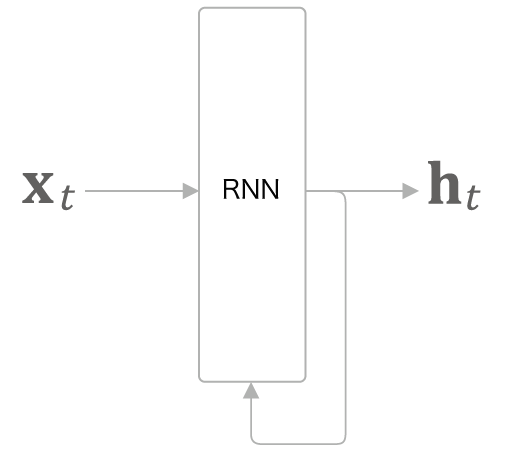
  - 각 시각에 입력되는 xt는 벡터라고 가정하자
  - 문장(단어 순서)을 다루는 경우를 예로 든다면 각 단어의 분산 표현(단어 벡터)이 xt가 되며
  - 이 분산 표현이 순서대로 하나씩 RNN계층에 입력되는 것이다. 
  - 잘 보면 출력이 2개로 분기되는것을 알 수 있다. 여기서 분기란 복제되어 분기함을 뜻한다.
  - 이렇게 분기된 출력 중 하나가 자기 자신에게 입력된다.(즉 순환)

### 2) 순환 구조 펼치기
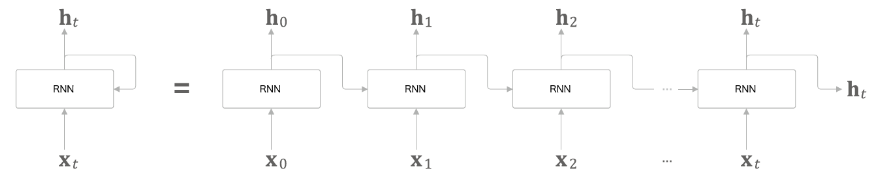

- RNN 계층의순환 구조를 펼침으로써 오른쪽으로 성장하는 긴 신경망으로 변신 시킬 수 있다.
- 지금까지 본 피드포워드 신경망과 같은 구조이다.
- 다만 위 그림에서 등장하는 다수의 RNN 계층 모두가 실제로는 '같은 계층'인 것이 지금까지의 신경망과는 다르다는 점이다.
- 추가적으로 시계열 데이터는 시간 방향으로 나열된다 따라서 시계열 데이터의 인덱스를 가리킬 때는 시각 이라는 용어를 사용한다.


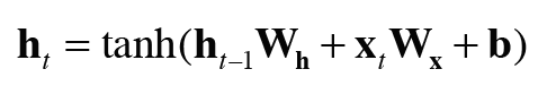
- 각 시각의 RNN 계층은 그 계층으로의 입력과 1개 전의 RNN 계층으로부터 출력을 받는다.
- 그리고 이 두 정보를 바탕으로 현 시각의 출력을 계산한다.
- 이때 수행하는 계산의 수식이 위의 그림과 같은 것이다.
  - RNN에서는 가중치가 2개 있다. 
    - 하나는 입력 x를 출력 h로 변환하기 위한 가중치 Wx이고
    - 다른 하나는 1개의 RNN 출력을 다음 시각의 출력으로 변환하기 위한 가중치 Wh이다.
    - 또한 편항 b도 있다.
    - 참고로 ht-1과 xt는 행벡터이다.
  - 위 식에서는 행렬 곱을 계산하고, 그 합을 tanh함수(쌍곡탄젠트)를 이용해 변환한다.
    - 그 결과가 t의 시각 출력 ht가 된다.
    - 이 ht는 다른 계층을 향해 위쪽으로 출력되는 동시에
    - 다음 시각의 RNN계층을 향해 오른쪽으로도 출력 된다.
  - 그런데 현재의 출력(ht)은 한 시각 이전 출력(ht-1)에 기초해 계산됨을 알 수 있다.
  - 다른 관점에서 보면 RNN은 h라는 상태를 가지고 있으며
  - 위 식의 형태로 갱신된다고 해석할 수 있다.
  
> 그래서 RNN계층을 상테를 가지는 계층 혹은 메모리가 있는 계층이라고 한다.

### 3) BPTT

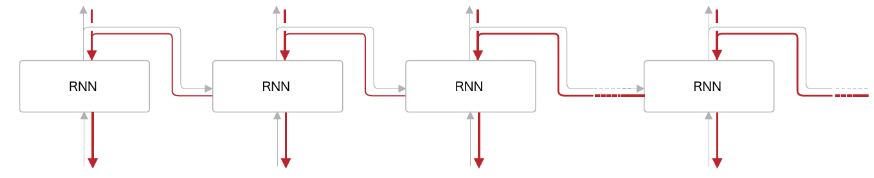

- 순환 구조를 펼친 후의 RNN에는 오차역전파법을 적용할 수 있다. 
- 즉, 먼저 순전파를 수행하고, 이어서 역전파를 수행하여 원하는 기울기를 구할 수 있다.
- 여기서의 오차역전파법은 시간 방향으로 펼친 신경망의 오차역전파법이란 뜻으로 BPTT(Backpropagation Through Time)라고 한다.
- 문제점 : 시간 크기가 커지면 역전파 시의 기울기가 불안정해지고, 시간 크기가 커지는 것에 비례하여 BPTT가 소비하는 컴퓨팅 자원도 증가하게 된다. 

### 4) Truncated BPTT
> 큰 시계열 데이터를 취급할 때는 흔히 신경망 연결을 적당한 길이로 끊는다. 시간축방향으로 너무 길어진 신경망을 적당한 지점에서 잘라내어 작은 신경망 여러 개로 만든다는 아이디어 있다. 그리고 이 잘라낸 작은 신경망에서 오차역전파법을 수행한다. 이것이 바로 Truncated BPTT라는 기법이다.

- 순전파의 흐름은 끊어지지 않고 전파되고 역전파의 연결은 적당한 길이로 잘라내어 잘라낸 신경망 단위로 학습을 수행한다.

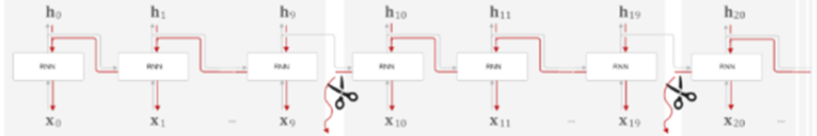

> 반드시 기억해야할 것은 역전파의 연결은 끊기지만 순전파의 연결은 끊어지지 않는다. 그러므로 RNN을 학습시킬 때는 순전파가 연결된다는 점을 고려해야한다. 즉 데이터를 순서대로 입력해야 한다는 뜻이다. 

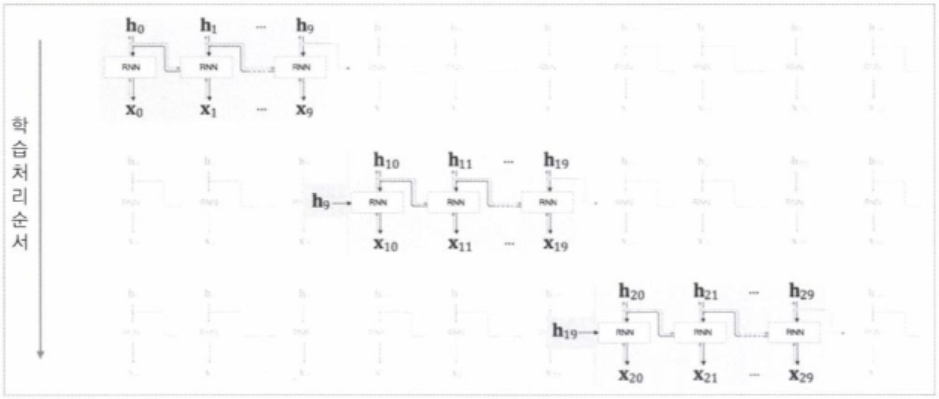

> 이런 식으로 순전파의 연결을 유지하면서 블록 단위로 오차역전파법을 적용할 수 있다.

### 5) Truncated BPTT의 미니배치 학습
> 지금까지의 Truncated BPTT 이야기에서는 미니배치 학습 시 각각의 미니배치가 어떤 식으로 이뤄지는지에 대해서는 생각하지 않았다. 하지만 우리는 미니배치 학습을 수행하기 때문에, 원래대로라면 구체적인 배치 방식을 고려해 위의 그림처럼 데이터를 순서대로 입력해야한다. 그렇게 하려면 데이터를 주는 시작 위치를 각 미니배치의 시작위치로 옮겨줘야 한다. <br><br> 예를 들면 첫번째 미니배치때는 처음부터 순서대로 데이터를 제공하고 두번째 미니배치때는 500번째 부터 데이터를 시작위치를 정하고 다시 순서대로 데이터를 제공하는 것이다.


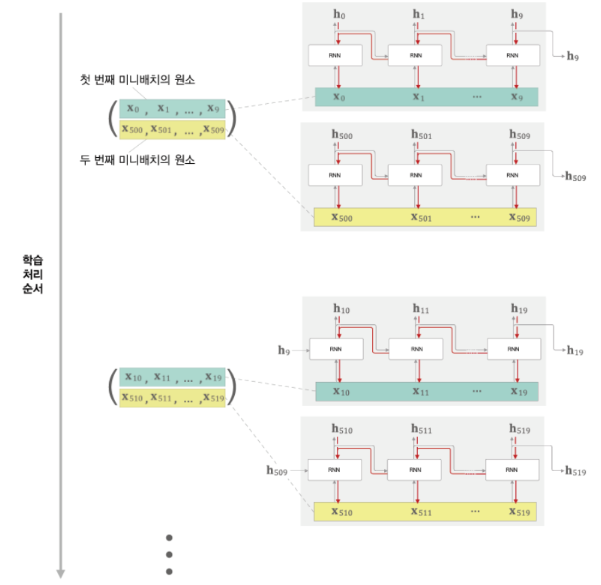

- 이 미니배치 데이터를 RNN의 입력 데이터로 사용해 학습을 수행한다. 
- 이후로는 순서대로 진행되므로 다음에 넘길 데이터는 각각 시계열 데이터의 10~19 번째 데이터와 510~519번째 데이터가 되는식이다.

> 이처럼 미니배치 학습을 수행할 때는 각 미니배치의 시작 위치를 오프셋으로 옮겨준 후 순서대로 제공하면 된다. 또한 데이터를 순서대로 입력하다가 끝에 도달하면 다시 처음부터 입력하도록 한다.

## 3. RNN 구현

### 1) RNN 계층 구현
> RNN 처치를 한 단계만 수행하는 RNN 클래스부터 구현해보고자 한다.

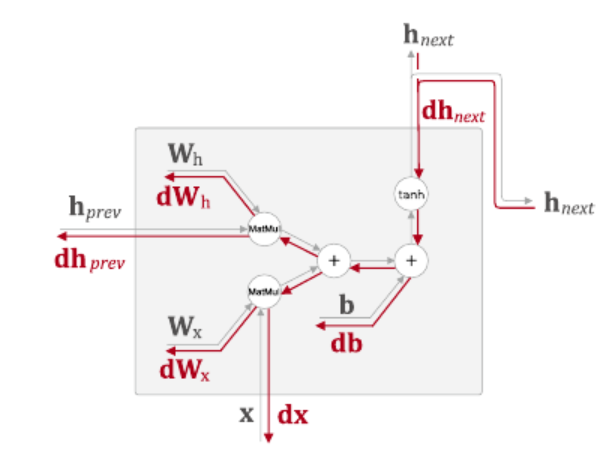

In [1]:
import numpy as np
class RNN:
  def __init__(self, Wx, Wh, b): # 가중치 2개와 편향 1개를 인수로 받는다.
    self.params = [Wx, Wh, b] # 인수로 받은 매개변수를 인스턴스 변수에 넣는다
    self.grads = [np.zeros_like(Wx), np.zeros_like(Wh), np.zeros_like(b)] # 각 매개변수에 대응하는 형태로 기울기를 초기화한 후 저장한다.
    self.cache = None # 역전파 계산 시 사용하는 중간 데이터를 담을 cache를 None으로 초기화 한다.

  def forward(self, x, h_prev): # 아래로부터 입력 x와 왼쪽으로부터 입력 h_prev를 받는다.
    Wx, Wh, b = self.params
    t = np.matmul(h_prev, Wh) + np.matmul(x, Wx) + b # matmul은 행렬곱
    h_next = np.tanh(t) # 현 시각 RNN계층으로부터의 출력

    self.cache = (x, h_prev, h_next) 
    return h_next

  def backward(self, dh_next):
    Wx, Wh, b = self.params
    x, h_prev, h_next = self.cache

    dt = dh_next * (1-h_next**2)
    db = np.sum(dt, axis=0)
    dWh = np.matmul(h_prev.T, dt)
    dh_prev = np.matmul(dt, Wh.T)
    dWx = np.matmul(x.T, dt)
    dx = np.matmul(dt, Wx.T)

    self.grads[0][...] = dWx
    self.grads[1][...] = dWh
    self.grads[2][...] = db
    
    return dx, dh_prev

### 2) Time RNN계층 구현
> Time RNN 계층은 T개의 RNN 계층으로 구성된다.(T는 임의의 수로 설정할 수 있다.)

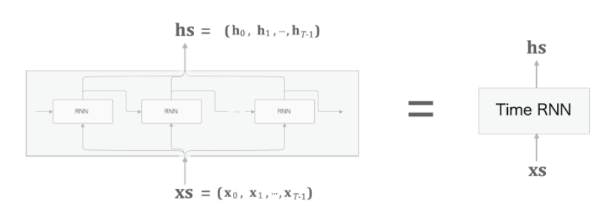

- RNN 계층 T개를 연결한 신경망이다.
- RNN계층의 은닉상태 h를 인스턴스 변수로 유지한다.
- 이 변수를 밑의 그림처럼 은닉 상태를 인계받는 용도로 이용한다.
- 이처럼 우리는 RNN 계층의 은닉상태를 Time RNN계층에서 관리하기로 한다
- 이렇게 하면 Time RNN 사용자는 RNN 계층 사이에서 은닉 상태를 인계하는 작업을 생각하지 않아도 된다는 장점이생긴다.

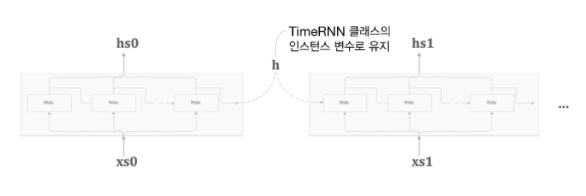

In [2]:
class TimeRNN:
  def __init__(self, Wx, Wh, b, stateful=False):
    self.params = [Wx, Wh, b]
    self.grads = [np.zeros_like(Wx), np.zeros_like(Wh), np.zeros_like(b)]
    self.layers = None # RNN 계층을 리스트로 저장하는 용도

    # h는 forward() 메서드를 불렀을 때의 마지막 RNN계층의 은닉상태를 저장
    # dh는 backward()를 불렀을 때 하나 앞 블록의 은닉상태의 기울기를 저장
    self.h, self.dh = None, None 
    self.stateful = stateful # True일때 Time RNN계층은상태가 있다 즉, 은닉상태를 유지한다는 뜻이다.
                             # 즉, 아무리 긴 시계열 데이터라도 Time RNN 계층의 순전파를 끊지 않고 전파한다는 의미
                             # False일때의 RNN계층은 은닉상태를 영행렬로 초기화 이것이 없으면 무상태라고 한다.  
  def set_state(self, h):
    self.h = h
  
  def reset_state(self):
    self.h = None

In [3]:
def forward(self, xs): # 순전파 메서드로 아래로부터 입력 xs를 받는다. 
  # xs는 T개 분량의 시계열 데이터를 하나로 모은 것이다.
  # N은 미니배치 크기, D는 입력벡터의 차원 수
  Wx, Wh, b = self.params
  N, T, D = xs.shape
  D, H = Wx.shape

  self.layers = []
  hs = np.empty((N,H,T), dtype='f') #  문장에서 출력값을 담을 그릇(hs)를 준비한다.

  if not self.stateful or self.h is None:
    self.h = np.zeros((N, H), dtype='f') # 은닉상태 h는 처음 호출 시에는 원소가 모두 0인 항상 영행렬로 초기화 된다.

  for t in range(T): # T 회 반복되는 for문 안에서 RNN 계층을 생성하여 인스턴스 layers에 추가한다.
    # 그 사이 RNN 계층이 각 시각 t의 은닉상태 h를 계산하고, 이를 hs에 해당 인덱스(시각)의 값을 설정한다.
    layer = RNN(*self.params)
    self.h = layer.forward(xs[:, t, :], self.h)
    hs[:, t, :] = self.h
    self.layers.append(layer)

  return hs 

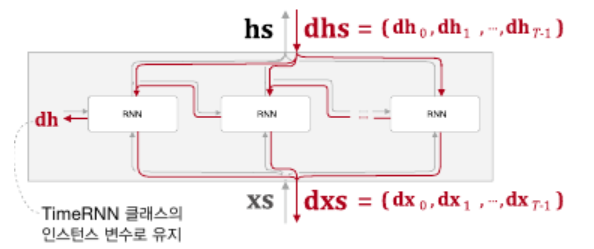

- 역전파
  - 상류(출력 쪽 층)에서부터 전해지는 기울기를 dhs로 쓰고
  - 하류로 보내는 기울기를 dxs로 쓴다.
  - Truncated BPTT를 수행하기 때문에 이 블록의 이전 시각 역전파는 필요하지 않다.
  - 단, 이전 시각의 은닉 상태 기울기는 인스턴스 변수 dh에 저장해 놓겠다.

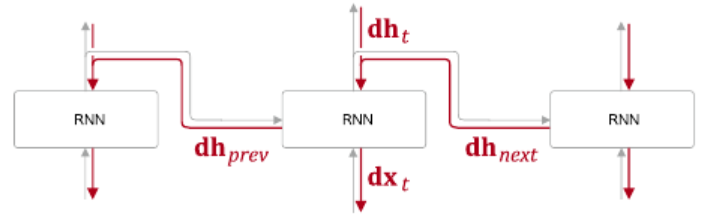

- t번째 RNN계층에서는 위로부터의 기울기 dht와 한 시각 뒤 계층으로부터의 기울기 dgnext가 전해진다.
- 여기서 주의점은 RNN계층이 순전파에서는 출력이 2개로 분기된다는 것이다.
- 순전파 시 분기했을 경우, 그 역전파에서는 각 기울기가 합산되어 전해진다.
- 따라서 역전파 시 RNN 계층에는 합산된 기울기(dht+dtnext)가 입력된다.

In [4]:
def backward(self, dhs):
  Wx, Wh, b = self.params
  N, T, H = dhs.shape
  D, H = Wx.shape

  dxs = np.empty((N, T, D), dtype='f') # 하류로 흘려보낼 기울기를 담을 그릇
  dh = 0
  grads = [0, 0, 0]
  
  for t in reversed(range(T)):
    layer = self.layers[t]
    # 각 기울기 dx를 구해 dxs의 해당 인덱스에 저장
    dx, dh = layer.backward(dhs[:, t, :] + dh) # 합산된 기울기
    dxs[:, t, :] = dx

    # 가중치 매개변수에 대해 각 RNN 계층의 기울기를 합산하여
    for i, grad in enumerate(layer.grads):
      grads[i] += grad
  # 최정 결과를 멤버 변수 self.grads에 덮어쓴다.
  for i, grad in enumerate(grads):
    self.grads[i][...] = grad
  self.dh = dh

  return dh


## 4. 시계열 데이터 처리 계층 구현
> 지금까지 RNN계층(과 시계열 데이터를 한꺼번에 처리하는 Time RNN계층)을 구현했는데, 이번절에서는 시계열 데이터를 처리하는 계층을 몇 개 더 만들어 보겠다. 또한 RNN을 사용한 언어 모델은 영어로 RNN Language Model이므로 앞으로 RNNLM이라 칭하겠다.

### 1) RNNLM의 전체 그림

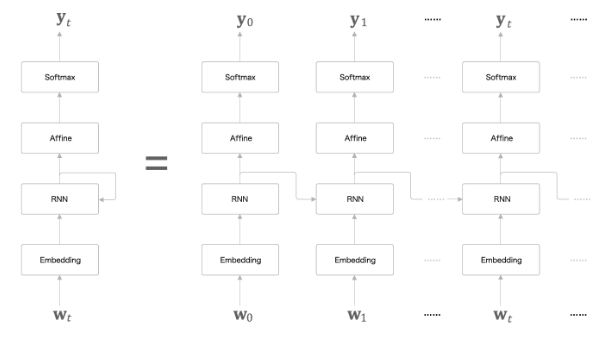

- 첫번째 층(가장 아래)은 Embedding 계층이다. 이 계층은 단어ID를 단어의 분산 표현(단어 벡터)으로 표현한다.
- 그리고 그 분산 표현이 RNN계층으로 입력된다.
- RNN계층은 은닉 상태를 다음층으로(위쪽으로)출력함과 동시에, 다음 시각 RNN계층으로(오른쪽)으로 출력한다.
- 그리고 RNN계층이 위로 출력한 은닉상태는 Affine계층을 거쳐 Softmax계층으로 전해진다.

> RNNLM은 지금까지 입력된 단어를 기억하고 그것을 바탕으로 다음에 출현할 단어를 예측한다. 이를 가능하게 하는 것이 바로 RNN계층의 존재이다. RNN계층이 과거에서 현재로 데이터를 계속 흘려보내즘으로써 과거의 정보를 인코딩해 저장할 수 있는 것이다.

### 2) Time 게층 구현
> 시계열 데이터를 한꺼번에 처리하는 계층을 Time Embedding, Time Affine 형태의 이름으로 구현하겠다. <br><br> Time Affine 계층은 Affine 계층을 T개 준비해서, 각 시각의 데이터를 개별적으로 처리하면 된다. Time Embedding 계층 역시 순전파 시에 T개의 Embedding 계층을 준비하고 각 Embedding계층이 각 시각의 데이터를 처리한다.<br><br> 시계열 버전의 Softmax를 살펴보자 Softmax계층을 구현할 때는 손실 오차를 구하는 Cross Entropy Error 계층도 함께 구현한다. 여기서는 밑의 그림과 같은 Time Softmax with Loss 게층으로 구현할 것이다.

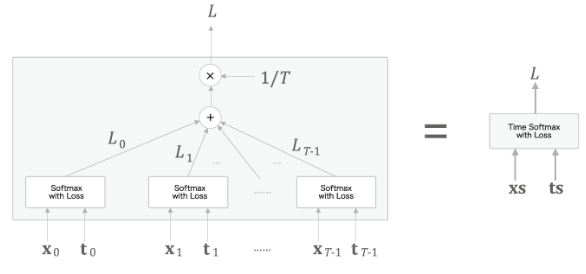

- x0이 x1등의 데이터는 아래층에서부터 전해지는 점수를 나타낸다.(점수란 확률로 정규화되기 전의 값이다.)
- t0sk t1등의 데이터는 정답 레이블을 나타낸다.
- T개의 Softmax with Loss 계층 각각이 손실을 산출한다.
- 그리고 그 손실들을 합산해 평균값이 최종 손실이 된다.

> 이때 수행하는 계산의 수식은 아래와 같다.

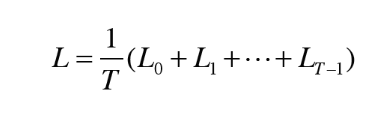

- 그런데 이 책의 Softmax with Loss 계층은 미니배치에 해다하는 손실의 평균을 구했다. 
- 즉 ,데이터 N개 짜리 미니배치라면 그 N개의 손실을 더해 다시 N으로 나눠 데이터 1개당 평균 손실을 구했다. 이와 마찬가지로 Time Softmax with Loss 계층도 시계열에 대한 평균을 구하는 것으로, 데이터 1개당 평균 손실을 구해 최종 출력으로 보낸다. 

In [5]:
# coding: utf-8
import sys
sys.path.append('/content/drive/MyDrive/인공지능/밑시딥2/')
from common.np import *  # import numpy as np (or import cupy as np)
from common.layers import *
from common.functions import sigmoid


class RNN:
    def __init__(self, Wx, Wh, b):
        self.params = [Wx, Wh, b]
        self.grads = [np.zeros_like(Wx), np.zeros_like(Wh), np.zeros_like(b)]
        self.cache = None

    def forward(self, x, h_prev):
        Wx, Wh, b = self.params
        t = np.dot(h_prev, Wh) + np.dot(x, Wx) + b
        h_next = np.tanh(t)

        self.cache = (x, h_prev, h_next)
        return h_next

    def backward(self, dh_next):
        Wx, Wh, b = self.params
        x, h_prev, h_next = self.cache

        dt = dh_next * (1 - h_next ** 2)
        db = np.sum(dt, axis=0)
        dWh = np.dot(h_prev.T, dt)
        dh_prev = np.dot(dt, Wh.T)
        dWx = np.dot(x.T, dt)
        dx = np.dot(dt, Wx.T)

        self.grads[0][...] = dWx
        self.grads[1][...] = dWh
        self.grads[2][...] = db

        return dx, dh_prev


class TimeRNN:
    def __init__(self, Wx, Wh, b, stateful=False):
        self.params = [Wx, Wh, b]
        self.grads = [np.zeros_like(Wx), np.zeros_like(Wh), np.zeros_like(b)]
        self.layers = None

        self.h, self.dh = None, None
        self.stateful = stateful

    def forward(self, xs):
        Wx, Wh, b = self.params
        N, T, D = xs.shape
        D, H = Wx.shape

        self.layers = []
        hs = np.empty((N, T, H), dtype='f')

        if not self.stateful or self.h is None:
            self.h = np.zeros((N, H), dtype='f')

        for t in range(T):
            layer = RNN(*self.params)
            self.h = layer.forward(xs[:, t, :], self.h)
            hs[:, t, :] = self.h
            self.layers.append(layer)

        return hs

    def backward(self, dhs):
        Wx, Wh, b = self.params
        N, T, H = dhs.shape
        D, H = Wx.shape

        dxs = np.empty((N, T, D), dtype='f')
        dh = 0
        grads = [0, 0, 0]
        for t in reversed(range(T)):
            layer = self.layers[t]
            dx, dh = layer.backward(dhs[:, t, :] + dh)
            dxs[:, t, :] = dx

            for i, grad in enumerate(layer.grads):
                grads[i] += grad

        for i, grad in enumerate(grads):
            self.grads[i][...] = grad
        self.dh = dh

        return dxs

    def set_state(self, h):
        self.h = h

    def reset_state(self):
        self.h = None


class LSTM:
    def __init__(self, Wx, Wh, b):
        '''

        Parameters
        ----------
        Wx: 입력 x에 대한 가중치 매개변수(4개분의 가중치가 담겨 있음)
        Wh: 은닉 상태 h에 대한 가장추 매개변수(4개분의 가중치가 담겨 있음)
        b: 편향（4개분의 편향이 담겨 있음）
        '''
        self.params = [Wx, Wh, b]
        self.grads = [np.zeros_like(Wx), np.zeros_like(Wh), np.zeros_like(b)]
        self.cache = None

    def forward(self, x, h_prev, c_prev):
        Wx, Wh, b = self.params
        N, H = h_prev.shape

        A = np.dot(x, Wx) + np.dot(h_prev, Wh) + b

        f = A[:, :H]
        g = A[:, H:2*H]
        i = A[:, 2*H:3*H]
        o = A[:, 3*H:]

        f = sigmoid(f)
        g = np.tanh(g)
        i = sigmoid(i)
        o = sigmoid(o)

        c_next = f * c_prev + g * i
        h_next = o * np.tanh(c_next)

        self.cache = (x, h_prev, c_prev, i, f, g, o, c_next)
        return h_next, c_next

    def backward(self, dh_next, dc_next):
        Wx, Wh, b = self.params
        x, h_prev, c_prev, i, f, g, o, c_next = self.cache

        tanh_c_next = np.tanh(c_next)

        ds = dc_next + (dh_next * o) * (1 - tanh_c_next ** 2)

        dc_prev = ds * f

        di = ds * g
        df = ds * c_prev
        do = dh_next * tanh_c_next
        dg = ds * i

        di *= i * (1 - i)
        df *= f * (1 - f)
        do *= o * (1 - o)
        dg *= (1 - g ** 2)

        dA = np.hstack((df, dg, di, do))

        dWh = np.dot(h_prev.T, dA)
        dWx = np.dot(x.T, dA)
        db = dA.sum(axis=0)

        self.grads[0][...] = dWx
        self.grads[1][...] = dWh
        self.grads[2][...] = db

        dx = np.dot(dA, Wx.T)
        dh_prev = np.dot(dA, Wh.T)

        return dx, dh_prev, dc_prev


class TimeLSTM:
    def __init__(self, Wx, Wh, b, stateful=False):
        self.params = [Wx, Wh, b]
        self.grads = [np.zeros_like(Wx), np.zeros_like(Wh), np.zeros_like(b)]
        self.layers = None

        self.h, self.c = None, None
        self.dh = None
        self.stateful = stateful

    def forward(self, xs):
        Wx, Wh, b = self.params
        N, T, D = xs.shape
        H = Wh.shape[0]

        self.layers = []
        hs = np.empty((N, T, H), dtype='f')

        if not self.stateful or self.h is None:
            self.h = np.zeros((N, H), dtype='f')
        if not self.stateful or self.c is None:
            self.c = np.zeros((N, H), dtype='f')

        for t in range(T):
            layer = LSTM(*self.params)
            self.h, self.c = layer.forward(xs[:, t, :], self.h, self.c)
            hs[:, t, :] = self.h

            self.layers.append(layer)

        return hs

    def backward(self, dhs):
        Wx, Wh, b = self.params
        N, T, H = dhs.shape
        D = Wx.shape[0]

        dxs = np.empty((N, T, D), dtype='f')
        dh, dc = 0, 0

        grads = [0, 0, 0]
        for t in reversed(range(T)):
            layer = self.layers[t]
            dx, dh, dc = layer.backward(dhs[:, t, :] + dh, dc)
            dxs[:, t, :] = dx
            for i, grad in enumerate(layer.grads):
                grads[i] += grad

        for i, grad in enumerate(grads):
            self.grads[i][...] = grad
        self.dh = dh
        return dxs

    def set_state(self, h, c=None):
        self.h, self.c = h, c

    def reset_state(self):
        self.h, self.c = None, None


class TimeEmbedding:
    def __init__(self, W):
        self.params = [W]
        self.grads = [np.zeros_like(W)]
        self.layers = None
        self.W = W

    def forward(self, xs):
        N, T = xs.shape
        V, D = self.W.shape

        out = np.empty((N, T, D), dtype='f')
        self.layers = []

        for t in range(T):
            layer = Embedding(self.W)
            out[:, t, :] = layer.forward(xs[:, t])
            self.layers.append(layer)

        return out

    def backward(self, dout):
        N, T, D = dout.shape

        grad = 0
        for t in range(T):
            layer = self.layers[t]
            layer.backward(dout[:, t, :])
            grad += layer.grads[0]

        self.grads[0][...] = grad
        return None


class TimeAffine:
    def __init__(self, W, b):
        self.params = [W, b]
        self.grads = [np.zeros_like(W), np.zeros_like(b)]
        self.x = None

    def forward(self, x):
        N, T, D = x.shape
        W, b = self.params

        rx = x.reshape(N*T, -1)
        out = np.dot(rx, W) + b
        self.x = x
        return out.reshape(N, T, -1)

    def backward(self, dout):
        x = self.x
        N, T, D = x.shape
        W, b = self.params

        dout = dout.reshape(N*T, -1)
        rx = x.reshape(N*T, -1)

        db = np.sum(dout, axis=0)
        dW = np.dot(rx.T, dout)
        dx = np.dot(dout, W.T)
        dx = dx.reshape(*x.shape)

        self.grads[0][...] = dW
        self.grads[1][...] = db

        return dx


class TimeSoftmaxWithLoss:
    def __init__(self):
        self.params, self.grads = [], []
        self.cache = None
        self.ignore_label = -1

    def forward(self, xs, ts):
        N, T, V = xs.shape

        if ts.ndim == 3:  # 정답 레이블이 원핫 벡터인 경우
            ts = ts.argmax(axis=2)

        mask = (ts != self.ignore_label)

        # 배치용과 시계열용을 정리(reshape)
        xs = xs.reshape(N * T, V)
        ts = ts.reshape(N * T)
        mask = mask.reshape(N * T)

        ys = softmax(xs)
        ls = np.log(ys[np.arange(N * T), ts])
        ls *= mask  # ignore_label에 해당하는 데이터는 손실을 0으로 설정
        loss = -np.sum(ls)
        loss /= mask.sum()

        self.cache = (ts, ys, mask, (N, T, V))
        return loss

    def backward(self, dout=1):
        ts, ys, mask, (N, T, V) = self.cache

        dx = ys
        dx[np.arange(N * T), ts] -= 1
        dx *= dout
        dx /= mask.sum()
        dx *= mask[:, np.newaxis]  # ignore_labelㅇㅔ 해당하는 데이터는 기울기를 0으로 설정

        dx = dx.reshape((N, T, V))

        return dx


class TimeDropout:
    def __init__(self, dropout_ratio=0.5):
        self.params, self.grads = [], []
        self.dropout_ratio = dropout_ratio
        self.mask = None
        self.train_flg = True

    def forward(self, xs):
        if self.train_flg:
            flg = np.random.rand(*xs.shape) > self.dropout_ratio
            scale = 1 / (1.0 - self.dropout_ratio)
            self.mask = flg.astype(np.float32) * scale

            return xs * self.mask
        else:
            return xs

    def backward(self, dout):
        return dout * self.mask


class TimeBiLSTM:
    def __init__(self, Wx1, Wh1, b1,
                 Wx2, Wh2, b2, stateful=False):
        self.forward_lstm = TimeLSTM(Wx1, Wh1, b1, stateful)
        self.backward_lstm = TimeLSTM(Wx2, Wh2, b2, stateful)
        self.params = self.forward_lstm.params + self.backward_lstm.params
        self.grads = self.forward_lstm.grads + self.backward_lstm.grads

    def forward(self, xs):
        o1 = self.forward_lstm.forward(xs)
        o2 = self.backward_lstm.forward(xs[:, ::-1])
        o2 = o2[:, ::-1]

        out = np.concatenate((o1, o2), axis=2)
        return out

    def backward(self, dhs):
        H = dhs.shape[2] // 2
        do1 = dhs[:, :, :H]
        do2 = dhs[:, :, H:]

        dxs1 = self.forward_lstm.backward(do1)
        do2 = do2[:, ::-1]
        dxs2 = self.backward_lstm.backward(do2)
        dxs2 = dxs2[:, ::-1]
        dxs = dxs1 + dxs2
        return dxs

# ====================================================================== #
# 이 아래의 계층들은 책에서 설명하지 않았거나
# 처리 속도보다는 쉽게 이해할 수 있도록 구현했습니다.
#
# TimeSigmoidWithLoss: 시계열 데이터용 시그모이드 + 손실 계층
# GRU: GRU 계층
# TimeGRU: 시계열 데이터용 GRU 계층
# BiTimeLSTM: 양방향 LSTM 계층
# Simple_TimeSoftmaxWithLoss：간단한 TimeSoftmaxWithLoss 계층의 구현
# Simple_TimeAffine: 간단한 TimeAffine 계층의 구현
# ====================================================================== #


class TimeSigmoidWithLoss:
    def __init__(self):
        self.params, self.grads = [], []
        self.xs_shape = None
        self.layers = None

    def forward(self, xs, ts):
        N, T = xs.shape
        self.xs_shape = xs.shape

        self.layers = []
        loss = 0

        for t in range(T):
            layer = SigmoidWithLoss()
            loss += layer.forward(xs[:, t], ts[:, t])
            self.layers.append(layer)

        return loss / T

    def backward(self, dout=1):
        N, T = self.xs_shape
        dxs = np.empty(self.xs_shape, dtype='f')

        dout *= 1/T
        for t in range(T):
            layer = self.layers[t]
            dxs[:, t] = layer.backward(dout)

        return dxs


class GRU:
    def __init__(self, Wx, Wh):
        '''

        Parameters
        ----------
        Wx: 입력 x에 대한 가중치 매개변수(3개 분의 가중치가 담겨 있음)
        Wh: 은닉 상태 h에 대한 가중치 매개변수(3개 분의 가중치가 담겨 있음)
        '''
        self.Wx, self.Wh = Wx, Wh
        self.dWx, self.dWh = None, None
        self.cache = None

    def forward(self, x, h_prev):
        H, H3 = self.Wh.shape
        Wxz, Wxr, Wx = self.Wx[:, :H], self.Wx[:, H:2 * H], self.Wx[:, 2 * H:]
        Whz, Whr, Wh = self.Wh[:, :H], self.Wh[:, H:2 * H], self.Wh[:, 2 * H:]

        z = sigmoid(np.dot(x, Wxz) + np.dot(h_prev, Whz))
        r = sigmoid(np.dot(x, Wxr) + np.dot(h_prev, Whr))
        h_hat = np.tanh(np.dot(x, Wx) + np.dot(r*h_prev, Wh))
        h_next = (1-z) * h_prev + z * h_hat

        self.cache = (x, h_prev, z, r, h_hat)

        return h_next

    def backward(self, dh_next):
        H, H3 = self.Wh.shape
        Wxz, Wxr, Wx = self.Wx[:, :H], self.Wx[:, H:2 * H], self.Wx[:, 2 * H:]
        Whz, Whr, Wh = self.Wh[:, :H], self.Wh[:, H:2 * H], self.Wh[:, 2 * H:]
        x, h_prev, z, r, h_hat = self.cache

        dh_hat =dh_next * z
        dh_prev = dh_next * (1-z)

        # tanh
        dt = dh_hat * (1 - h_hat ** 2)
        dWh = np.dot((r * h_prev).T, dt)
        dhr = np.dot(dt, Wh.T)
        dWx = np.dot(x.T, dt)
        dx = np.dot(dt, Wx.T)
        dh_prev += r * dhr

        # update gate(z)
        dz = dh_next * h_hat - dh_next * h_prev
        dt = dz * z * (1-z)
        dWhz = np.dot(h_prev.T, dt)
        dh_prev += np.dot(dt, Whz.T)
        dWxz = np.dot(x.T, dt)
        dx += np.dot(dt, Wxz.T)

        # rest gate(r)
        dr = dhr * h_prev
        dt = dr * r * (1-r)
        dWhr = np.dot(h_prev.T, dt)
        dh_prev += np.dot(dt, Whr.T)
        dWxr = np.dot(x.T, dt)
        dx += np.dot(dt, Wxr.T)

        self.dWx = np.hstack((dWxz, dWxr, dWx))
        self.dWh = np.hstack((dWhz, dWhr, dWh))

        return dx, dh_prev


class TimeGRU:
    def __init__(self, Wx, Wh, stateful=False):
        self.Wx, self.Wh = Wx, Wh
        selfdWx, self.dWh = None, None
        self.layers = None
        self.h, self.dh = None, None
        self.stateful = stateful

    def forward(self, xs):
        N, T, D = xs.shape
        H, H3 = self.Wh.shape

        self.layers = []
        hs = np.empty((N, T, H), dtype='f')

        if not self.stateful or self.h is None:
            self.h = np.zeros((N, H), dtype='f')

        for t in range(T):
            layer = GRU(self.Wx, self.Wh)
            self.h = layer.forward(xs[:, t, :], self.h)
            hs[:, t, :] = self.h
            self.layers.append(layer)

        return hs

    def backward(self, dhs):
        N, T, H = dhs.shape
        D = self.Wx.shape[0]

        dxs = np.empty((N, T, D), dtype='f')
        self.dWx, self.dWh = 0, 0

        dh = 0
        for t in reversed(range(T)):
            layer = self.layers[t]
            dx, dh = layer.backward(dhs[:, t, :] + dh)

            dxs[:, t, :] = dx
            self.dWx += layer.dWx
            self.dWh += layer.dWh

        self.dh = dh
        return dxs

    def set_state(self, h):
        self.h = h

    def reset_state(self):
        self.h = None


class Simple_TimeSoftmaxWithLoss:
    def __init__(self):
        self.params, self.grads = [], []
        self.cache = None

    def forward(self, xs, ts):
        N, T, V = xs.shape
        layers = []
        loss = 0

        for t in range(T):
            layer = SoftmaxWithLoss()
            loss += layer.forward(xs[:, t, :], ts[:, t])
            layers.append(layer)
        loss /= T

        self.cache = (layers, xs)
        return loss

    def backward(self, dout=1):
        layers, xs = self.cache
        N, T, V = xs.shape
        dxs = np.empty(xs.shape, dtype='f')

        dout *= 1/T
        for t in range(T):
            layer = layers[t]
            dxs[:, t, :] = layer.backward(dout)

        return dxs


class Simple_TimeAffine:
    def __init__(self, W, b):
        self.W, self.b = W, b
        self.dW, self.db = None, None
        self.layers = None

    def forward(self, xs):
        N, T, D = xs.shape
        D, M = self.W.shape

        self.layers = []
        out = np.empty((N, T, M), dtype='f')
        for t in range(T):
            layer = Affine(self.W, self.b)
            out[:, t, :] = layer.forward(xs[:, t, :])
            self.layers.append(layer)

        return out

    def backward(self, dout):
        N, T, M = dout.shape
        D, M = self.W.shape

        dxs = np.empty((N, T, D), dtype='f')
        self.dW, self.db = 0, 0
        for t in range(T):
            layer = self.layers[t]
            dxs[:, t, :] = layer.backward(dout[:, t, :])

            self.dW += layer.dW
            self.db += layer.db

        return dxs






## 5. RNNLM 학습과 평가

### 1) RNNLM 구현

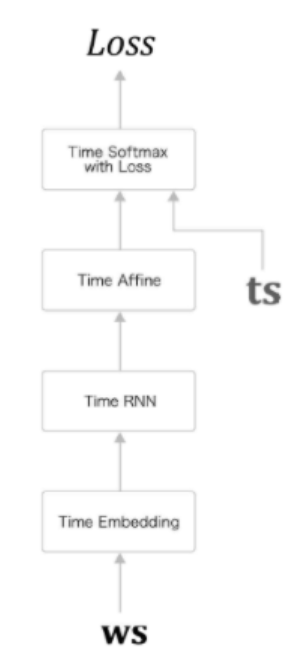

- SimpleRnnln 클래스는 4개의 Time 계층을 쌓은 신경망이다.

In [6]:
import sys
sys.path.append('/content/drive/MyDrive/인공지능/밑시딥2/')
import numpy as np
from common.time_layers import *

class SimpleRnnlm:
  def __init__(self, vocab_size, wordvec_size, hidden_size):
    V, D, H = vocab_size, wordvec_size, hidden_size
    rn = np.random.randn

    # 가중치 초기화
    embed_W = (rn(V,D) / 100).astype('f')
    rnn_Wx = (rn(D,H) / np.sqrt(D)).astype('f')
    rnn_Wh = (rn(H,H) / np.sqrt(H)).astype('f')
    rnn_b = np.zeros(H).astype('f')
    affine_W = (rn(H,V) / np.sqrt(H)).astype('f')
    affine_b = np.zeros(V).astype('f')

    # 계층 생성
    self.layers = [
        TimeEmbedding(embed_W),
        TimeRNN(rnn_Wx, rnn_Wh, rnn_b, stateful = True),
        TimeAffine(affine_W, affine_b)
    ]
    self.loss_layer = TimeSoftmaxWithLoss()
    self.rnn_layer = self.layers[1]

    # 모든 가중치와 기울기를 리스트에 모은다.
    self.params, self.grads = [], []
    for layer in self.layers:
      self.params += layer.params
      self.grads += layer.grads
  
  def forward(self, xs, ts):
    for layer in self.layers:
      xs = layer.forward(xs)
    loss = self.loss_layer.forward(xs, ts)
    return loss

  def backward(self, dout = 1):
    dout = self.loss_layer.backward(dout)
    for layer in reversed(self.layers):
      dout = layer.backward(dout)
    return dout

  def reset_state(self):
    self.rnn_layer.reset_state()

## 2) 언어 모델의 평가
> 언어 모델은 주어진 과거 단어로부터 다음에 출현할 단어의 확률분포를 출력합니다. 이때 언어 모델의 예측 성능은 평가하는 척도로 퍼플렉서티를 자주 이용합니다. <br><br> 퍼플렉서티는 간단히 말하면 확률의 역수입니다. 이 퍼플렉서티는 작을수록 좋습니다.

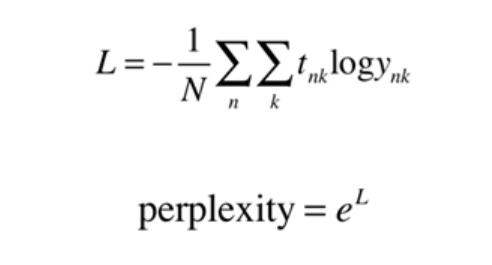

- N은 데이터의 총개수
- tn은 원핫 벡터로 나타낸 정답 레이블
- tnk는 n개째 데이터의 k번째 값을 의미
- ynk는 확률분포를 나타낸다.
- L은 신경망의 손실을 뜻하며, 

> 사실 교차 엔트로피 오차를 뜻하는 식과 완전 같은 식이다. 이 L을 이용해 e^L을 계산한 값이 곧 퍼플렉서티이다. 즉, 데이터가 하나일 때 설명한 확률의 역수, 분기 수, 선택사항의 수 같은 개념이 그대로 적용된다. 결국 퍼플렉서티가 작아질수록 분기 수가 줄어 좋은 모델이 된다.

### 3) RNNLM의 학습 코드

말뭉치 크기: 1000, 어휘 수: 418
| 에폭 1 | 퍼플렉서티 377.56
| 에폭 2 | 퍼플렉서티 253.94
| 에폭 3 | 퍼플렉서티 224.83
| 에폭 4 | 퍼플렉서티 216.19
| 에폭 5 | 퍼플렉서티 208.69
| 에폭 6 | 퍼플렉서티 202.95
| 에폭 7 | 퍼플렉서티 199.92
| 에폭 8 | 퍼플렉서티 196.72
| 에폭 9 | 퍼플렉서티 193.00
| 에폭 10 | 퍼플렉서티 192.74
| 에폭 11 | 퍼플렉서티 189.00
| 에폭 12 | 퍼플렉서티 191.56
| 에폭 13 | 퍼플렉서티 190.48
| 에폭 14 | 퍼플렉서티 191.25
| 에폭 15 | 퍼플렉서티 190.49
| 에폭 16 | 퍼플렉서티 186.15
| 에폭 17 | 퍼플렉서티 184.19
| 에폭 18 | 퍼플렉서티 181.47
| 에폭 19 | 퍼플렉서티 182.39
| 에폭 20 | 퍼플렉서티 183.27
| 에폭 21 | 퍼플렉서티 180.93
| 에폭 22 | 퍼플렉서티 176.62
| 에폭 23 | 퍼플렉서티 175.20
| 에폭 24 | 퍼플렉서티 176.16
| 에폭 25 | 퍼플렉서티 172.71
| 에폭 26 | 퍼플렉서티 172.56
| 에폭 27 | 퍼플렉서티 168.60
| 에폭 28 | 퍼플렉서티 167.37
| 에폭 29 | 퍼플렉서티 164.10
| 에폭 30 | 퍼플렉서티 157.58
| 에폭 31 | 퍼플렉서티 159.80
| 에폭 32 | 퍼플렉서티 154.29
| 에폭 33 | 퍼플렉서티 153.26
| 에폭 34 | 퍼플렉서티 148.57
| 에폭 35 | 퍼플렉서티 147.81
| 에폭 36 | 퍼플렉서티 140.50
| 에폭 37 | 퍼플렉서티 136.33
| 에폭 38 | 퍼플렉서티 133.93
| 에폭 39 | 퍼플렉서티 127.57
| 에폭 40 | 퍼플렉서티 123.18
| 에폭 41 | 퍼플렉서티 122.57
| 에폭 42 | 퍼플렉서티 117.73
| 에폭 43 | 퍼플렉서티 112

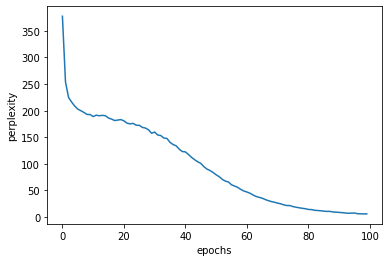

In [7]:
import sys
sys.path.append('/content/drive/MyDrive/인공지능/밑시딥2/')
import matplotlib.pyplot as plt
import numpy as np
from common.optimizer import SGD
from dataset import ptb
from simple_rnnlm import SimpleRnnlm


# 하이퍼파라미터 설정
batch_size = 10
wordvec_size = 100
hidden_size = 100 # RNN의 은닉 상태 벡터의 원소 수
time_size = 5     # Truncated BPTT가 한 번에 펼치는 시간 크기
lr = 0.1
max_epoch = 100

# 학습 데이터 읽기(전체 중 1000개만)
corpus, word_to_id, id_to_word = ptb.load_data('train')
corpus_size = 1000
corpus = corpus[:corpus_size]
vocab_size = int(max(corpus) + 1)

xs = corpus[:-1]  # 입력
ts = corpus[1:]   # 출력(정답 레이블)
data_size = len(xs)
print('말뭉치 크기: %d, 어휘 수: %d' % (corpus_size, vocab_size))

# 학습 시 사용하는 변수
max_iters = data_size // (batch_size * time_size)
time_idx = 0
total_loss = 0
loss_count = 0
ppl_list = []

# 모델 생성
model = SimpleRnnlm(vocab_size, wordvec_size, hidden_size)
optimizer = SGD(lr)

# 1.미니배치의 각 샘플의 읽기 시작 위치를 계산
jump = (corpus_size - 1) // batch_size
offsets = [i * jump for i in range(batch_size)]

for epoch in range(max_epoch):
    for iter in range(max_iters):
        # 2.미니배치 취득
        batch_x = np.empty((batch_size, time_size), dtype='i')
        batch_t = np.empty((batch_size, time_size), dtype='i')
        for t in range(time_size):
            for i, offset in enumerate(offsets):
                batch_x[i, t] = xs[(offset + time_idx) % data_size]
                batch_t[i, t] = ts[(offset + time_idx) % data_size]
            time_idx += 1

        # 기울기를 구하여 매개변수 갱신
        loss = model.forward(batch_x, batch_t)
        model.backward()
        optimizer.update(model.params, model.grads)
        total_loss += loss
        loss_count += 1

    # 3.에폭마다 퍼플렉서티 평가
    ppl = np.exp(total_loss / loss_count)
    print('| 에폭 %d | 퍼플렉서티 %.2f'
          % (epoch+1, ppl))
    ppl_list.append(float(ppl))
    total_loss, loss_count = 0, 0

# 그래프 그리기
x = np.arange(len(ppl_list))
plt.plot(x, ppl_list, label='train')
plt.xlabel('epochs')
plt.ylabel('perplexity')
plt.show()


- 지금까지 본 신경만 학습과 거의 같지만 두 가지가 다른 부분이 있다.
  - 데이터를 제공하는 방법
  - 퍼플렉서티 계산 부분

- 소스코드 1에서는 각 미니배치가 데이터를 읽기 시작하눈 위치를 계산해 offsets에 저장한다. 다시 말해 이 offsets의 각 원소에 데이터를 일근 시작 위치가 담기기 된다.

- 2에서는 데이터를 순차적으로 읽는다 먼저 그릇인 batch_x와 t를 준비한다. 그런 다음 변수 time_idx를 1씩 늘리면서 말뭉치에서 time_idx 위치의 데이터를 얻는다. 여기에서 1에서 계산한 offsets를 이용하여 각 미니배치에서 오프셋을 추가합니다. 또한 말뭉치를 읽는 위치와 말뭉치 크기를 넘어설 경우 말뭉치의 처음으로 돌아와야 하는데 이를 위해 말뭉치의 크기로 나눈 나머지를 인덱스로 사용한다.

- 3은 퍼플렉서티를 계산한다. 여기서는 에폭마다 퍼플렉서티를 구하기 위해 에폭마다 손실의 평균을 구하고, 그 값을 사용해 퍼플렉서티를 구한다.

### 4) RNNLM의 Trainer 클래스

| 에폭 1 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 418.47
| 에폭 2 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 377.41
| 에폭 3 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 258.80
| 에폭 4 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 218.45
| 에폭 5 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 208.58
| 에폭 6 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 207.80
| 에폭 7 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 200.87
| 에폭 8 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 200.00
| 에폭 9 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 195.61
| 에폭 10 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 191.48
| 에폭 11 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 192.86
| 에폭 12 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 189.34
| 에폭 13 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 192.92
| 에폭 14 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 187.64
| 에폭 15 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 186.74
| 에폭 16 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 190.92
| 에폭 17 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 189.54
| 에폭 18 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 184.99
| 에폭 19 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 181.16
| 에폭 20 |  반복 1 / 19 | 시간 1[s] | 퍼플렉서티 181.83
| 에폭 21 |  반복 1 / 19 | 시간 1[s] | 퍼플렉서티 179.37
| 에폭 22 |  반복 1 / 19 | 시간 1[s] | 퍼플렉서티 177.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48152 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54140 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54540 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47113 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49436 missing from current font.
  font.set_

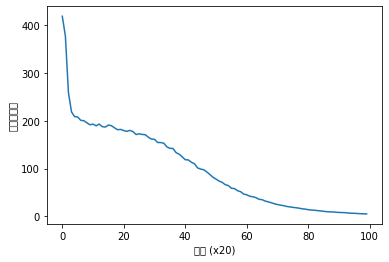

In [8]:
# coding: utf-8
import sys
sys.path.append('/content/drive/MyDrive/인공지능/밑시딥2')
from common.optimizer import SGD
from common.trainer import RnnlmTrainer
from dataset import ptb
from simple_rnnlm import SimpleRnnlm


# 하이퍼파라미터 설정
batch_size = 10
wordvec_size = 100
hidden_size = 100  # RNN의 은닉 상태 벡터의 원소 수
time_size = 5  # RNN을 펼치는 크기
lr = 0.1
max_epoch = 100

# 학습 데이터 읽기
corpus, word_to_id, id_to_word = ptb.load_data('train')
corpus_size = 1000  # 테스트 데이터셋을 작게 설정
corpus = corpus[:corpus_size]
vocab_size = int(max(corpus) + 1)
xs = corpus[:-1]  # 입력
ts = corpus[1:]  # 출력（정답 레이블）

# 모델 생성
model = SimpleRnnlm(vocab_size, wordvec_size, hidden_size)
optimizer = SGD(lr)
trainer = RnnlmTrainer(model, optimizer)

trainer.fit(xs, ts, max_epoch, batch_size, time_size)
trainer.plot()


- 미니배치를 순차적으로 만들어
- 모델의 순전파와 역전파를 호출하고
- 옵치마이저로 가중치를 갱신하고
- 퍼플렉서티를 구한다.